<a href="https://colab.research.google.com/github/LianaHuang99/TechLent/blob/main/ProductDemandPredictor_surfactant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
warnings.filterwarnings('ignore')

In [6]:
from google.colab import files
uploaded = files.upload()

In [7]:
uploaded = files.upload()

In [8]:
uploaded = files.upload()

In [9]:
uploaded = files.upload()

In [10]:
df = pd.read_csv('alkylbenzene_filtered.csv')

In [11]:
df_og = pd.read_csv('oil and gas.csv')

In [12]:
df_rig = pd.read_csv('us_rig_counts.csv')

In [13]:
df_frac = pd.read_csv('Frac Spread Count.csv')

In [14]:
df.shape

(5171, 32)

In [15]:
df_og.shape

(23024, 8)

In [16]:
df_rig.shape

(723, 7)

In [17]:
df_frac.shape

(568, 3)

In [18]:
df.head()

,no_chem_recs,carrier_status,UploadKey,bgLatitude,Latitude,TotalBaseWaterVolume,StateName,WellName,TotalBaseNonWaterVolume,TVD,...,calcMass,Supplier,PercentHFJob,bgSupplier,TradeName,is_valid_cas,categoryCAS,Purpose,CASNumber,bgIngredientName
0,False,auto-detected,0021798d-61e3-4f1e-9f4b-4573611c52a1,27.027056,27.026730,111934.0,Texas,MRS SK East #232,0.0,13634.0,...,81.443628,MISSING,0.006416,missing,NaN,True,proprietary,NaN,Proprietary,NaN
1,False,auto-detected,0021798d-61e3-4f1e-9f4b-4573611c52a1,27.027056,27.026730,111934.0,Texas,MRS SK East #232,0.0,13634.0,...,81.443628,MISSING,0.006416,missing,NaN,True,proprietary,NaN,Proprietary,NaN
2,False,auto-detected,0027f3d1-50fb-4031-bfdb-6c7e71f22e13,31.449594,31.449460,262030.0,Texas,Braman Minerals 45 18,0.0,6150.0,...,0.180060,MISSING,0.000008,missing,NaN,True,perfect match,Other Chemicals,68584-27-0,"benzenesulfonic acid, c10-16-alkyl derivs., po..."
3,False,auto-detected,002bd88a-b20f-4953-bb3f-01cfb269351a,32.284760,32.284637,18134964.0,New Mexico,FORTY NINER RIDGE UNIT 105H,0.0,9780.0,...,6726.526523,MISSING,0.003948,missing,NaN,True,perfect match,NaN,68584-25-8,"benzenesulfonic acid, c10-16-alkyl derivs., co..."
4,False,auto-detected,002bd88a-b20f-4953-bb3f-01cfb269351a,32.284760,32.284637,18134964.0,New Mexico,FORTY NINER RIDGE UNIT 105H,0.0,9780.0,...,6726.526523,MISSING,0.003948,missing,NaN,True,perfect match,NaN,68584-24-7,"benzenesulfonic acid, c10-16-alkyl derivs., co..."


In [19]:
df.columns

Index(['no_chem_recs', 'carrier_status', 'UploadKey', 'bgLatitude', 'Latitude',
       'TotalBaseWaterVolume', 'StateName', 'WellName',
       'TotalBaseNonWaterVolume', 'TVD', 'bgLongitude', 'APINumber',
       'Longitude', 'OperatorName', 'CountyName', 'primarySupplier', 'date',
       'bgCountyName', 'bgStateName', 'bgOperatorName', 'IngredientName',
       'bgCAS', 'calcMass', 'Supplier', 'PercentHFJob', 'bgSupplier',
       'TradeName', 'is_valid_cas', 'categoryCAS', 'Purpose', 'CASNumber',
       'bgIngredientName'],
      dtype='object')

In [20]:
df.describe()

,bgLatitude,Latitude,TotalBaseWaterVolume,TotalBaseNonWaterVolume,TVD,bgLongitude,Longitude,calcMass,PercentHFJob
count,5171.000000,5171.000000,5.171000e+03,5.144000e+03,5171.000000,5171.000000,5171.000000,5171.000000,5.171000e+03
mean,30.502906,30.503216,1.166685e+07,5.916572e+04,10199.458054,-99.069903,-99.069877,4998.230624,4.536546e-03
std,2.635144,2.635562,1.044548e+07,7.829633e+05,19164.090340,3.635812,3.635500,16932.529183,1.639087e-02
min,26.175703,26.175352,3.530000e+03,0.000000e+00,0.000000,-119.669504,-119.669505,0.026917,4.427847e-07
25%,28.598672,28.597617,4.205464e+06,0.000000e+00,8150.000000,-102.047326,-102.046911,46.872156,1.215731e-04
50%,30.490231,30.490030,1.077416e+07,0.000000e+00,10251.000000,-98.969362,-98.969210,1477.224170,3.773123e-03
75%,32.094640,32.094878,1.751373e+07,0.000000e+00,11630.000000,-97.712181,-97.711900,7291.610402,7.466885e-03
max,48.185635,48.185635,3.467892e+08,2.946064e+07,968226.000000,-80.111851,-80.111853,782687.966876,8.052519e-01


In [21]:
df.isna().sum()

,0
no_chem_recs,0
carrier_status,0
UploadKey,0
bgLatitude,0
Latitude,0
TotalBaseWaterVolume,0
StateName,0
WellName,0
TotalBaseNonWaterVolume,27
TVD,0


In [22]:
df['StateName'].value_counts()

,count
StateName,
Texas,4095
Louisiana,700
New Mexico,176
Oklahoma,68
Wyoming,42
California,30
Montana,22
Colorado,10
Pennsylvania,9


In [23]:
df['CountyName'].value_counts()

,count
CountyName,
La Salle,661
Karnes,528
De Soto,309
Reeves,301
Andrews,270
...,...
Dewey,1
Logan,1
Duchesne,1


In [24]:
df_og.head()

,Symbol,Date,Open,High,Low,Close,Volume,Currency
0,Brent Oil,2000-01-04,23.90,24.70,23.89,24.39,32509,USD
1,Brent Oil,2000-01-05,24.25,24.37,23.70,23.73,30310,USD
2,Brent Oil,2000-01-06,23.55,24.22,23.35,23.62,44662,USD
3,Brent Oil,2000-01-07,23.57,23.98,23.05,23.09,34826,USD
4,Brent Oil,2000-01-10,23.04,23.78,23.04,23.73,26388,USD


In [25]:
df_og['Symbol'].value_counts()

,count
Symbol,
Heating Oil,5770
Brent Oil,5768
Crude Oil WTI,5744
Natural Gas,5742


In [26]:
df_wti = df_og[df_og['Symbol'] == 'Crude Oil WTI']
df_wti.shape

(5744, 8)

In [27]:
df_wti.to_csv("wti_price.csv", index=False)

In [28]:
df_wti = pd.read_csv('wti_price.csv')

In [29]:
df_wti

,Symbol,Date,Open,High,Low,Close,Volume,Currency
0,Crude Oil WTI,2000-01-04,25.20,25.69,24.71,25.55,74788,USD
1,Crude Oil WTI,2000-01-05,25.50,25.61,24.87,24.91,70944,USD
2,Crude Oil WTI,2000-01-06,24.80,25.34,24.51,24.78,85252,USD
3,Crude Oil WTI,2000-01-07,24.65,25.00,24.15,24.22,91828,USD
4,Crude Oil WTI,2000-01-10,24.22,24.75,24.02,24.67,68901,USD
...,...,...,...,...,...,...,...,...
5739,Crude Oil WTI,2022-06-13,120.19,122.25,117.47,120.93,372403,USD
5740,Crude Oil WTI,2022-06-14,121.09,123.68,116.62,118.93,366320,USD
5741,Crude Oil WTI,2022-06-15,119.07,119.61,114.60,115.31,301750,USD
5742,Crude Oil WTI,2022-06-16,115.98,118.08,112.31,117.59,162543,USD


In [30]:
df['DateTime'] = pd.to_datetime(df['date'])
df_wti['DateTime'] = pd.to_datetime(df_wti['Date'])
df_rig['DateTime'] = pd.to_datetime(df_rig['Date'])
df_frac['DateTime'] = pd.to_datetime(df_frac['Date'])

In [31]:
df['week'] = df['DateTime'].dt.to_period('W').apply(lambda r: r.start_time)
df_wti['week'] = df_wti['DateTime'].dt.to_period('W').apply(lambda r: r.start_time)
df_rig['week'] = df_rig['DateTime'].dt.to_period('W').apply(lambda r: r.start_time)
df_frac['week'] = df_frac['DateTime'].dt.to_period('W').apply(lambda r: r.start_time)

In [32]:
df_wti_weekly = df_wti.groupby('week', as_index = False).agg({'Open': 'mean',
                                                               'High': 'mean',
                                                                'Low': 'mean',
                                                                'Close': 'mean',
                                                                'Volume':'mean'})

<span style="font-size: 30px;">**Feature Engineering**</span>

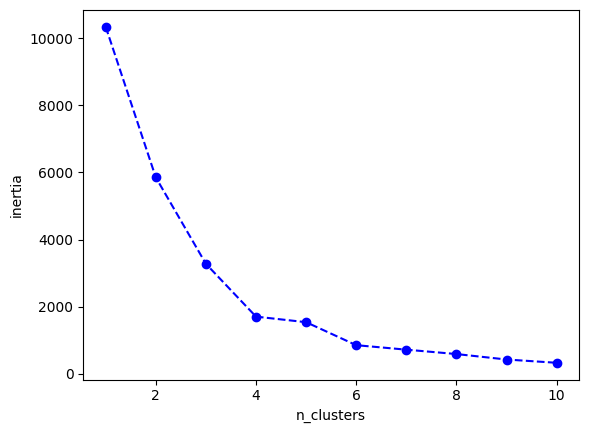

In [33]:
from sklearn.cluster import KMeans
n_clusters = range(1, 11)
inertias = []
for num in n_clusters:
    kmeans = make_pipeline(StandardScaler(), KMeans(n_clusters=num))
    kmeans.fit(df[['Latitude', 'Longitude']])
    inertias.append(kmeans[1].inertia_)
plt.plot(n_clusters, inertias, 'bo--')
plt.xlabel('n_clusters')
plt.ylabel('inertia')
plt.show()

In [34]:
kmeans = make_pipeline(StandardScaler(), KMeans(n_clusters=4))
kmeans.fit(df[['Latitude', 'Longitude']])
df['Region'] = kmeans[1].labels_

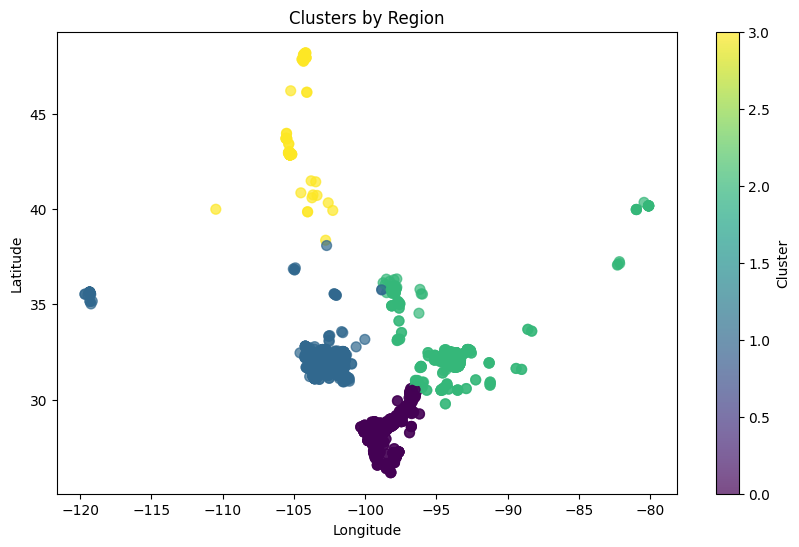

In [35]:

# Scatter plot of Latitude and Longitude with cluster coloring
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], c=df['Region'], cmap='viridis', s=50, alpha=0.7)
plt.colorbar(label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.title('Clusters by Region')
plt.show()


In [36]:
df['bgOperatorName'].value_counts()

,count
bgOperatorName,
carrizo,421
indigo,293
eog,275
bpx,232
trinity,212
...,...
kaiser-francis,1
"newpek, llc - ( alfa group )",1
lightning,1


In [37]:
weekly_location_mass = df.groupby(['week', 'Region', 'bgOperatorName', 'bgCountyName', 'bgStateName']).agg({
    'calcMass': 'sum'
}).reset_index()

In [38]:
weekly_location_mass.rename(columns={'calcMass': 'WeeklyMass', 'bgOperatorName':'operator', 'bgCountyName':'county', 'bgStateName':'state'}, inplace=True)

In [39]:
weekly_location_mass.shape

(1863, 6)

In [40]:
df_loc_m2 = pd.merge(weekly_location_mass, df_wti_weekly, on = 'week', how = 'left')
df_loc_m2['AvgPrice'] = df_loc_m2[['Open', 'High', 'Low', 'Close']].mean(axis = 1)
df_loc_m2

,week,Region,operator,county,state,WeeklyMass,Open,High,Low,Close,Volume,AvgPrice
0,2011-04-18,2,eog,cooke,texas,854.026666,109.1925,110.5075,107.750,109.7525,176818.5,109.300625
1,2012-01-30,1,devon,crane,texas,0.321526,98.1960,99.3700,96.970,97.8140,306630.4,98.087500
2,2012-02-06,1,devon,ector,texas,0.972772,98.5260,99.4080,97.260,98.5080,325134.2,98.425500
3,2012-04-23,1,jetta,ward,texas,0.231761,103.7500,104.4980,103.060,104.0520,212185.2,103.840000
4,2012-05-07,1,jetta,ward,texas,0.258050,97.2740,97.7280,95.534,96.9940,301991.8,96.882500
...,...,...,...,...,...,...,...,...,...,...,...,...
1858,2022-11-28,0,trinity,wilson,texas,17757.246000,NaN,NaN,NaN,NaN,NaN,NaN
1859,2022-12-05,0,trinity,wilson,texas,23486.070000,NaN,NaN,NaN,NaN,NaN,NaN
1860,2022-12-12,0,trinity,wilson,texas,10418.508000,NaN,NaN,NaN,NaN,NaN,NaN
1861,2022-12-19,0,bpx,karnes,texas,48.192000,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df_loc_m3 = pd.merge(df_loc_m2, df_rig, on = 'week', how = 'left')
df_loc_m3.drop(columns = 'DateTime', inplace = True)

In [42]:
df_loc_m4 = pd.merge(df_loc_m3, df_frac, on = 'week', how = 'left')
df_loc_m4['logMass'] = np.log1p(df_loc_m4['WeeklyMass'])
df_loc_m4.columns

Index(['week', 'Region', 'operator', 'county', 'state', 'WeeklyMass', 'Open',
       'High', 'Low', 'Close', 'Volume', 'AvgPrice', 'Date_x',
       'Total Rigs 2016', 'Oil', 'Gas', 'Misc', 'Ratio', 'Total Rigs',
       'Date_y', 'Total Frac Spreads w/w', 'Weekly Frac Spread', 'DateTime',
       'logMass'],
      dtype='object')

In [43]:
df_loc_m4.drop(columns = ['DateTime', 'Date_x','Date_y','Oil','Gas','Misc','Ratio', 'Total Rigs 2016','Total Frac Spreads w/w'], inplace = True)

In [45]:
df_loc_m4.rename(columns = {'WeeklyMass':'mass','Total Rigs':'rigs', 'Weekly Frac Spread':'fracSpread'}, inplace = True)
df_loc_m4.head()

,week,Region,operator,county,state,mass,Open,High,Low,Close,Volume,AvgPrice,rigs,fracSpread,logMass
0,2011-04-18,2,eog,cooke,texas,854.026666,109.1925,110.5075,107.750,109.7525,176818.5,109.300625,1800.0,NaN,6.751133
1,2012-01-30,1,devon,crane,texas,0.321526,98.1960,99.3700,96.970,97.8140,306630.4,98.087500,1989.0,NaN,0.278787
2,2012-02-06,1,devon,ector,texas,0.972772,98.5260,99.4080,97.260,98.5080,325134.2,98.425500,1994.0,NaN,0.679440
3,2012-04-23,1,jetta,ward,texas,0.231761,103.7500,104.4980,103.060,104.0520,212185.2,103.840000,1965.0,NaN,0.208445
4,2012-05-07,1,jetta,ward,texas,0.258050,97.2740,97.7280,95.534,96.9940,301991.8,96.882500,1986.0,NaN,0.229563


In [46]:
df_m4 = df_loc_m4.copy()
df_m4['Location'] = df_m4['county'] + ', ' + df_m4['state']

In [47]:
df_m4['logMass'].isna().sum()

0

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


def loss(y_true, y_pred):
    MAE = mean_absolute_error(y_true, y_pred)
    MSE = mean_squared_error(y_true, y_pred)
    R2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(MSE)

    print(f'RMSE: {rmse}\nMAE is {MAE}\nMSE is {MSE}\nR2 score is {R2}')

In [49]:
max_lag = 26  # Maximum lag to test
correlations = {}
best_lags = {}
lag_features = ['Close','AvgPrice', 'Volume', 'rigs', 'fracSpread']
for feature in lag_features:
    df_lag = pd.DataFrame()
    # Calculate correlation for each lag
    for lag in range(1, max_lag + 1):
        df_lag[f'{feature}_lag_{lag}'] = df_m4[feature].shift(lag)  # Create lagged feature
        correlation = df_lag[f'{feature}_lag_{lag}'].corr(df_m4['logMass'])  # Compute correlation
        correlations[lag] = correlation

    # Find the lag with the highest absolute correlation
    best_lag = max(correlations, key=lambda x: abs(correlations[x]))
    best_lags[feature] = best_lag
    print(f"Best lag for {feature}: {best_lag}")
    print(f"Correlation: {correlations[best_lag]}")

Best lag for Close: 2
Correlation: -0.45576166225519593
Best lag for AvgPrice: 2
Correlation: -0.43679832118573825
Best lag for Volume: 21
Correlation: 0.261358969571053
Best lag for rigs: 1
Correlation: -0.4236305580331513
Best lag for fracSpread: 1
Correlation: -0.05340813569723558


In [50]:
for feature, lag in best_lags.items():
    df_m4[f'Lag{feature}'] = df_m4[feature].shift(lag)
df_m4.columns

Index(['week', 'Region', 'operator', 'county', 'state', 'mass', 'Open', 'High',
       'Low', 'Close', 'Volume', 'AvgPrice', 'rigs', 'fracSpread', 'logMass',
       'Location', 'LagClose', 'LagAvgPrice', 'LagVolume', 'Lagrigs',
       'LagfracSpread'],
      dtype='object')

In [51]:
df_m4.to_csv('Dec6M4.csv')

In [52]:
from sklearn.base import BaseEstimator, TransformerMixin

class TargetEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, target_column, encode_column):
        self.target_column = target_column
        self.encode_column = encode_column
        self.mapping = {}

    def fit(self, X, y):
        # Ensure the encode column exists in X
        if self.encode_column not in X.columns:
            raise KeyError(f"Column '{self.encode_column}' not found in X.")

        # Compute mean target value for each category in the encode_column
        df = X.copy()
        df[self.target_column] = y
        self.mapping = df.groupby(self.encode_column)[self.target_column].mean().to_dict()
        return self

    def transform(self, X):
        # Replace the encode_column with the mean target value
        X_transformed = X.copy()
        if self.encode_column not in X_transformed.columns:
            raise KeyError(f"Column '{self.encode_column}' not found in X.")
        X_transformed[self.encode_column] = X_transformed[self.encode_column].map(self.mapping)
        # Fill NaN values with the global mean of the target
        global_mean = np.mean(list(self.mapping.values()))
        X_transformed[self.encode_column].fillna(global_mean, inplace=True)
        return X_transformed[self.encode_column]


In [53]:
tgt = TargetEncoder(target_column='logMass', encode_column='Location')
tgt.fit(df_m4[['Location']], df_m4[['logMass']])
df_m4['Location_enc'] = tgt.transform(df_m4[['Location']])

In [54]:
tgt = TargetEncoder(target_column='logMass', encode_column='operator')
tgt.fit(df_m4[['operator']], df_m4[['logMass']])
df_m4['operator_enc'] = tgt.transform(df_m4[['operator']])

In [55]:
df_m4['operator_enc']

,operator_enc
0,6.198011
1,5.164356
2,5.164356
3,0.259889
4,0.259889
...,...
1886,9.307531
1887,9.307531
1888,9.307531
1889,7.962220


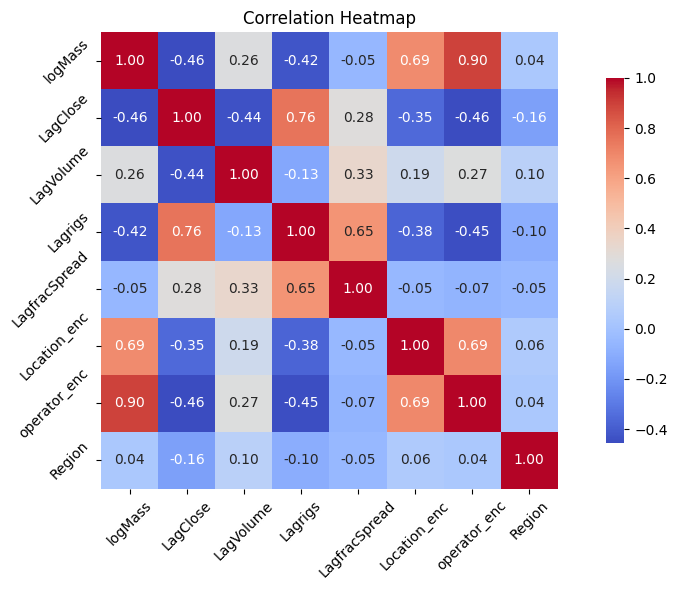

In [56]:
import seaborn as sns

corr_columns = ['logMass','LagClose', 'LagVolume', 'Lagrigs','LagfracSpread', 'Location_enc','operator_enc', 'Region']
correlation_matrix = df_m4[corr_columns].corr(method = 'pearson')
plt.figure(figsize = (10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap= 'coolwarm', fmt = '.2f', square = True, cbar_kws={'shrink':.8})
plt.title('Correlation Heatmap')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.tight_layout()
plt.show()

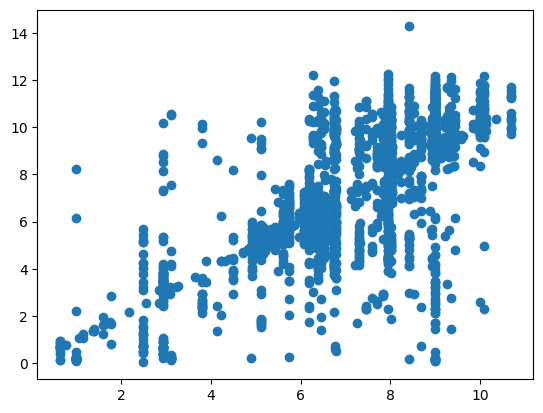

In [57]:
plt.scatter(df_m4['Location_enc'], df_m4['logMass'])

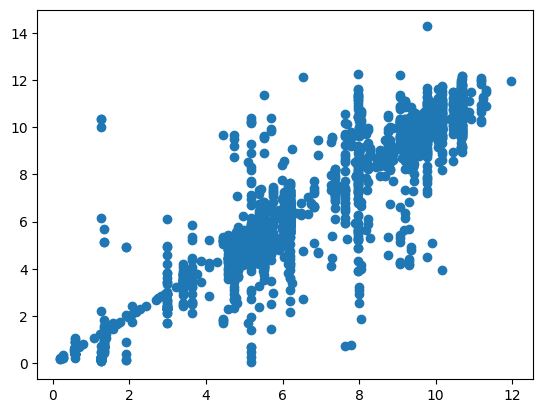

In [58]:
plt.scatter(df_m4['operator_enc'], df_m4['logMass'])

In [112]:
class Transformer4():
    def fit(self, X, y= None):
        df = pd.DataFrame()

        self.loc_encoder = TargetEncoder(target_column='logMass', encode_column='Location')
        self.loc_encoder.fit(X, y)
        #df['Location'] = self.loc_encoder.transform(X)
        self.opt_encoder = TargetEncoder(target_column='logMass', encode_column='operator')
        self.opt_encoder.fit(X, y)
        df['operator'] = self.opt_encoder.transform(X)
        df['loc_opt'] = self.loc_encoder.transform(X) * df['operator']
        #df['operator2'] = df['operator'] * df['operator']
        #df['lagClose_opt'] =  X['LagClose'] * df['operator']
        #df['Region'] = X['Region']
        #df['LagClose'] =  X['LagClose']
        #df['AvgPrice'] = X['AvgPrice']
        #df['LagVolume'] =  X['LagVolume']
        #df['Lagrigs'] = X['Lagrigs']
        #df['fracSpread'] = X['fracSpread']
        #df['Rig_Price'] = X['LagRig'] * X['LagClose']
        #df['Rig2'] = X['LagRig'] * X['LagRig']
        #df['Price2'] = X['LagClose'] * X['LagClose']
        #df['LagFracSpread'] = X['LagFracSpread']
        #df['Location_Price'] = df['Location'] * df['LagClose']
        #df['Location_Volume'] = df['Location'] *df['LagVolume']
        #df['Location_Rig'] = df['Location'] * df['LagRig']

        self.mean = df.mean()

    def transform(self, X, y= None):
        df = pd.DataFrame()

        #df['Location'] = self.loc_encoder.transform(X)
        df['operator'] = self.opt_encoder.transform(X)
        df['loc_opt'] = self.loc_encoder.transform(X) * df['operator']
        #df['operator2'] = df['operator'] * df['operator']
        #df['lagClose_opt'] =  X['LagClose'] * df['operator']
        #df['Region'] = X['Region']
        #df['AvgPrice'] = X['AvgPrice']
        #df['LagClose'] =  X['LagClose']
        #df['LagAvgPrice'] = X['LagAvgPrice']
        #df['LagVolume'] =  X['LagVolume']
        #df['Lagrigs'] = X['Lagrigs']
        #df['fracSpread'] = X['fracSpread']
        df.fillna(self.mean, inplace = True)
        #df['Rig_Price'] = X['LagRig'] * X['LagClose']
        #df['Rig2'] = X['LagRig'] * X['LagRig']
        #df['Price2'] = X['LagClose'] * X['LagClose']
        #df['LagFracSpread'] = X['LagFracSpread']
        #df['Location_Price'] = df['Location'] * df['LagClose']
        #df['Location_Volume'] = df['Location'] * df['LagVolume']
        #df['Location_Rig'] = df['Location'] * df['LagRig']
        self.features = df.columns
        df.fillna(self.mean, inplace = True)
        #df.drop(columns = 'Location', inplace = True)
        return df

    def fit_transform(self, X, y = None):
        self.fit(X,y)
        return self.transform(X)


In [113]:

features = list(df_m4.columns)
target = 'logMass'
features.remove(target)
X = df_m4[features]
y = df_m4[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [114]:
steps_lr = [('tf', Transformer4()),
          ('rescaler', MinMaxScaler()),
          ('lr', LinearRegression())]

model_lr = Pipeline(steps_lr)
model_lr.fit(X_train, y_train)
y_train_pred = model_lr.predict(X_train)
y_test_pred = model_lr.predict(X_test)
print('Training:')
loss(y_train, y_train_pred)
print('Testing:')
loss(y_test, y_test_pred)

Training:
RMSE: 1.3161344873802592
MAE is 0.8521712316530815
MSE is 1.7322099888716977
R2 score is 0.80432836879263
Testing:
RMSE: 1.4493792244458978
MAE is 0.925674924768498
MSE is 2.1007001362553925
R2 score is 0.7647768174053333


In [115]:
steps_rfr = [('tf', Transformer4()),
          ('rfr', RandomForestRegressor())]

model_rfr = Pipeline(steps_rfr)
model_rfr.fit(X_train, y_train)
y_train_pred = model_rfr.predict(X_train)
y_test_pred = model_rfr.predict(X_test)
print('Training:')
loss(y_train, y_train_pred)
print('Testing:')
loss(y_test, y_test_pred)


Training:
RMSE: 1.0383170687766965
MAE is 0.6447407235440096
MSE is 1.0781023353130312
R2 score is 0.8782168190263214
Testing:
RMSE: 1.3849159359215812
MAE is 0.834313933891909
MSE is 1.917992149569549
R2 score is 0.7852353080637464


[0.84332929 0.07914646 0.07752425]


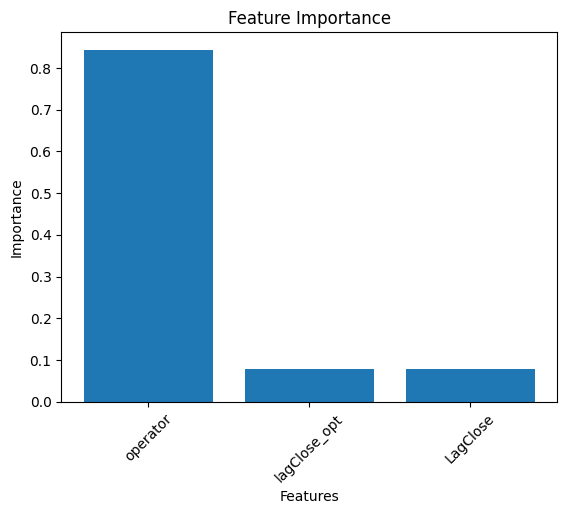

In [105]:
feature_importance = model_rfr.steps[1][1].feature_importances_
features = model_rfr.steps[0][1].features
print(feature_importance)
plt.bar(features, feature_importance)
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

In [83]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'rfr__n_estimators': [100, 200, 500],
    'rfr__max_depth': [5, 10, 20, None],
    'rfr__min_samples_split': [2, 5, 10],
    'rfr__min_samples_leaf': [1, 2, 4],
    'rfr__max_features': ['auto', 'sqrt', 'log2']
}

# Create the Random Forest model
model_rfr = Pipeline(steps_rfr)

# Perform grid search
grid_search = GridSearchCV(estimator=model_rfr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'rfr__max_depth': 10, 'rfr__max_features': 'log2', 'rfr__min_samples_leaf': 1, 'rfr__min_samples_split': 2, 'rfr__n_estimators': 500}


In [84]:
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)
print('Training:')
loss(y_train, y_train_pred)
print('Testing:')
loss(y_test, y_test_pred)

Training:
RMSE: 0.7131878115191873
MAE is 0.486873859590992
MSE is 0.5086368544995278
R2 score is 0.9410194905879337
Testing:
RMSE: 1.4193738450317972
MAE is 0.8844746833220483
MSE is 2.0146221119603482
R2 score is 0.7953319513052703


In [85]:
print(grid_search.best_score_)

-2.1476737198240192


In [86]:
y_test_pred.mean()

6.916438064651526

In [111]:
from sklearn.ensemble import GradientBoostingRegressor
steps_gbr = [('tf', Transformer4()),
          ('gbr', GradientBoostingRegressor())]

model_gbr = Pipeline(steps_gbr)
model_gbr.fit(X_train, y_train)
y_train_pred = model_gbr.predict(X_train)
y_test_pred = model_gbr.predict(X_test)
print('Training:')
loss(y_train, y_train_pred)
print('Testing:')
loss(y_test, y_test_pred)


Training:
RMSE: 1.312954666930467
MAE is 0.8199504483802534
MSE is 1.7238499574144936
R2 score is 0.8047052597382286
Testing:
RMSE: 1.5748360657227158
MAE is 1.0076618599047786
MSE is 2.480108633901002
R2 score is 0.7244522833905739


In [77]:
pip install --upgrade scikit-learn xgboost


In [81]:

steps_xgb = [('tf', Transformer4()),
          ('xgb', XGBRegressor(apply_caching=True))]

model_xgb = Pipeline(steps_xgb)
model_xgb.fit(X_train, y_train)
y_train_pred = model_xgb.predict(X_train)
y_test_pred = model_xgb.predict(X_test)
print('Training:')
loss(y_train, y_train_pred)
print('Testing:')
loss(y_test, y_test_pred)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

<span style = 'font-size: 30px;'>**Tune Hyperparameters**</span>

In [ ]:
param_grid_rfr = {
    'rfr__max_depth': [5,10, 20, 30],
    'rfr__min_samples_split': [2, 5, 10],
    'rfr__min_samples_leaf': [2, 4, 6]
}

rf = Pipeline(steps_rfr)
# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid_rfr, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit to the data
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

y_train_pred = grid_search.best_estimator_.predict(X_train)
y_test_pred = grid_search.best_estimator_.predict(X_test)
print('Training:')
loss(y_train, y_train_pred)
print('Testing:')
loss(y_test, y_test_pred)

In [ ]:
param_grid_xgb = {
    'xgb__max_depth': [3, 5, 10, 20],
    'xgb__min_child_weight': [1, 3, 5],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    #'xgb__n_estimators': [100, 200, 300]
}

xgb = Pipeline(steps_xgb)
# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit to the data
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

y_train_pred = grid_search.best_estimator_.predict(X_train)
y_test_pred = grid_search.best_estimator_.predict(X_test)
print('Training:')
loss(y_train, y_train_pred)
print('Testing:')
loss(y_test, y_test_pred)